# us-accidents

Use the "Run" button to execute the code.

# US Accidents Exploratory Data Analysis


1.   EDA
2.   Source
    - Kaggle
    - Information about accidents
    - useful to prevent accidents








In [3]:
pip install  opendatasets --upgrade

In [1]:
import opendatasets as od
download_url='https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: divyanh
Your Kaggle Key: ··········


100%|██████████| 89.0M/89.0M [00:01<00:00, 87.8MB/s]


In [2]:
data_filename='./zomato-bangalore-restaurants/zomato.csv'

## Data preparation and cleaning


1.   Load file using pandas
2.   Look info about the file
      - fix incorrect or missing values





In [3]:
import pandas as pd


In [4]:
df=pd.read_csv(data_filename)

In [5]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [6]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.describe()


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [12]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerics_df=df.select_dtypes(include=numerics)
len(numerics_df.columns)

1

In [13]:
df.isna()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


percentage of missing values per column

In [17]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percentages

dish_liked                     0.542916
rate                           0.150337
phone                          0.023358
approx_cost(for two people)    0.006690
rest_type                      0.004389
cuisines                       0.000870
location                       0.000406
listed_in(type)                0.000000
menu_item                      0.000000
reviews_list                   0.000000
url                            0.000000
address                        0.000000
votes                          0.000000
book_table                     0.000000
online_order                   0.000000
name                           0.000000
listed_in(city)                0.000000
dtype: float64

In [18]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

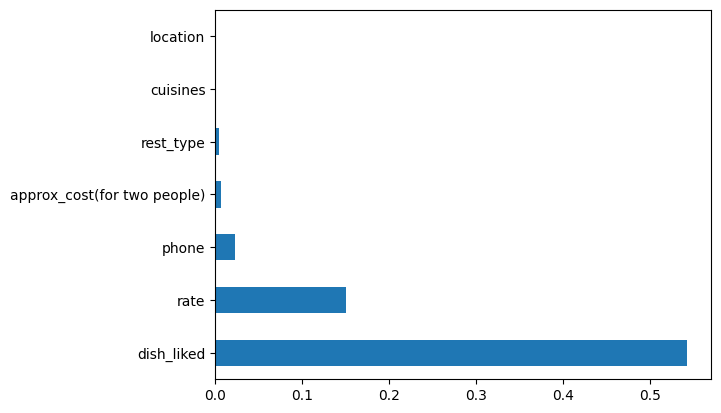

In [22]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

<Axes: >

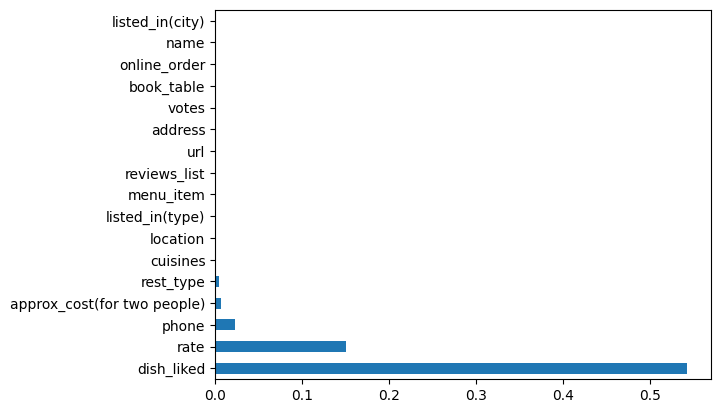

In [19]:
missing_percentages.plot(kind='barh')

## Exploratory analysis and visualisation

Columns we'll analyse:

1. Location
2. Online_order
2. rate
1. rest_type





###Location

In [23]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
df.location

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [30]:
location=df.location.unique()
location[:50]

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street'], dtype=object)

In [31]:
location_by_restaurants=df.location.value_counts()
location_by_restaurants

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [32]:
'Indira Nagar' in df.location

False

In [33]:
'I' in df.location

False

In [34]:
'i' in df.location

False

<Axes: >

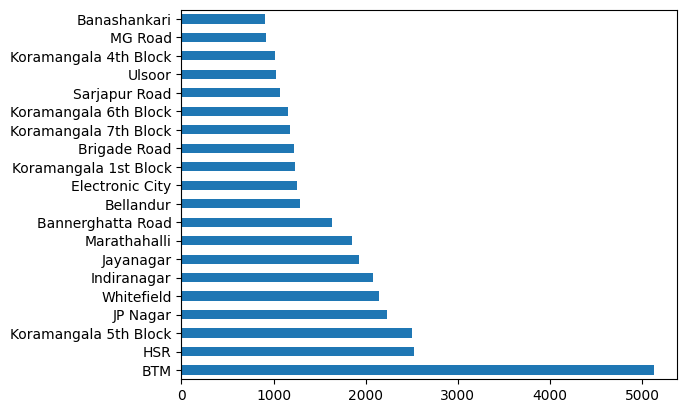

In [36]:
location_by_restaurants[:20].plot(kind='barh')

In [37]:
import seaborn as sns
sns.set_style("darkgrid")

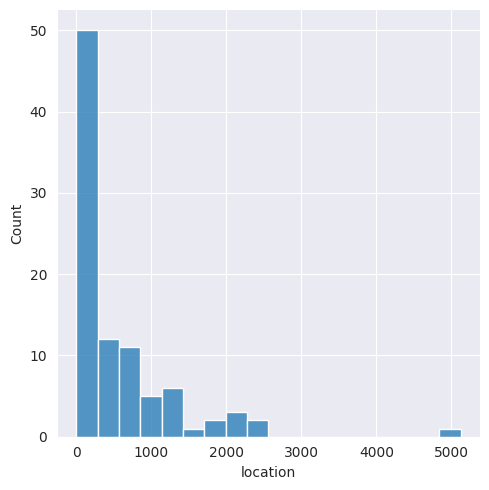

In [40]:
sns.displot(location_by_restaurants)

In [41]:
high_restaurants_location= location_by_restaurants[ location_by_restaurants >= 2000]
less_restaurants_location= location_by_restaurants[ location_by_restaurants < 1000]

In [42]:
len(high_restaurants_location)

6

In [43]:
len(less_restaurants_location)

75

<Axes: xlabel='location', ylabel='Count'>

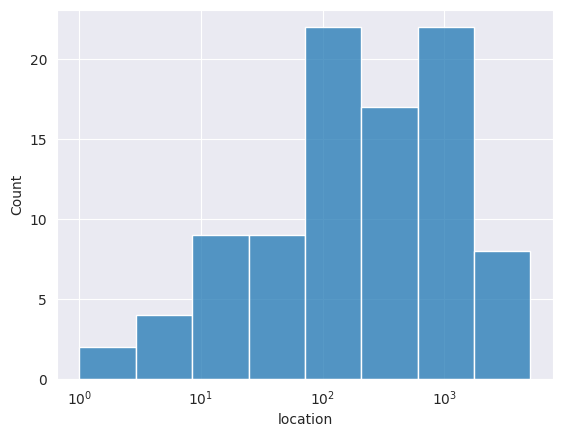

In [45]:
sns.histplot(location_by_restaurants, log_scale=True)

In [47]:
location_by_restaurants[location_by_restaurants <= 100]

CV Raman Nagar          90
Vijay Nagar             80
RT Nagar                80
Sanjay Nagar            76
Sadashiv Nagar          63
Sahakara Nagar          53
Koramangala             48
East Bangalore          44
Jalahalli               38
Magadi Road             34
Rammurthy Nagar         32
Langford Town           27
Sankey Road             27
Old Madras Road         22
Mysore Road             22
Kanakapura Road         19
KR Puram                18
Uttarahalli             17
Hebbal                  14
North Bangalore         14
Kengeri                  9
Nagarbhavi               9
Central Bangalore        8
West Bangalore           6
Yelahanka                6
Jakkur                   3
Rajarajeshwari Nagar     2
Peenya                   1
Name: location, dtype: int64

###online_order

In [48]:
df.online_order

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [54]:
order_by_online= df.online_order[df.online_order=='Yes']
len(order_by_online)

30444

In [56]:
order_by_offline= df.online_order[df.online_order=='No']
len(order_by_offline)

21273

###rate

In [63]:
ratings=df.rate.value_counts()

<Axes: >

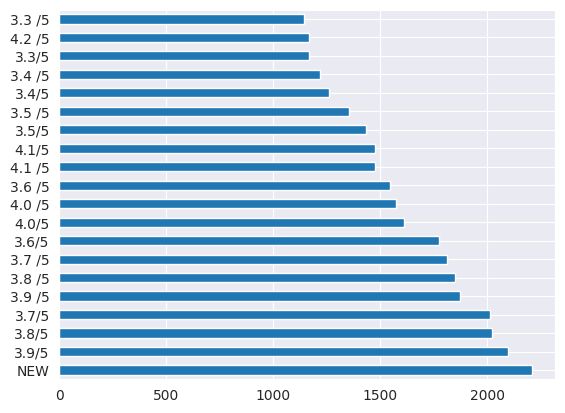

In [64]:
ratings[:20].plot(kind='barh')

In [68]:
high_ratings=ratings[ratings >= 4.0]
len(high_ratings)

62

In [70]:
low_ratings = ratings[ratings < 4.0]
len(low_ratings)

2

###rest_type

<Axes: ylabel='rest_type'>

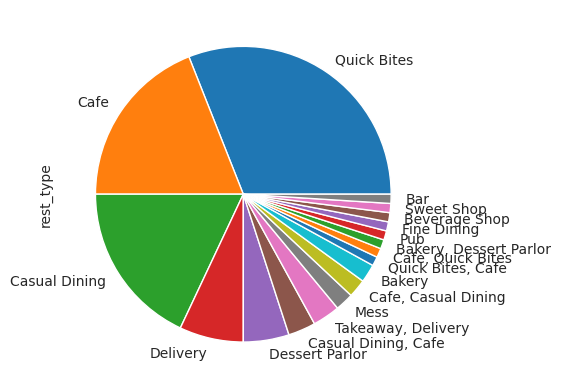

In [83]:
df.rest_type[:100].value_counts().plot(kind='pie')

## Summary and conclusion

Insights:

1. Only 6 locations in bangalore has more number of restaurents.
1. 58.86% of bengalure have option for ordering food in online.
2. 41.13% of bengalure have only offline order.
1. There are more than 2000 new restaurants in bangalore.
1. 3000+ restaurants in bangalore have 4 + ratings.
2. Quick bites , cafe and casual dinnings are the majortiy of restaurant type in bangalore.







